In [2]:
from featureranker.rankers import *
from featureranker.utils import *
from featureranker.plots import *

import pandas as pd
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [2]:
# Load and check data
cancer = load_breast_cancer(as_frame=True)
df = cancer.data.merge(cancer.target, left_index=True, right_index=True)
view_data(df)
X, y = get_data(df, labels='target')

There are no NaN values in the dataset


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits


L1 ranking:   0%|          | 0/100 [00:00<?, ?it/s]

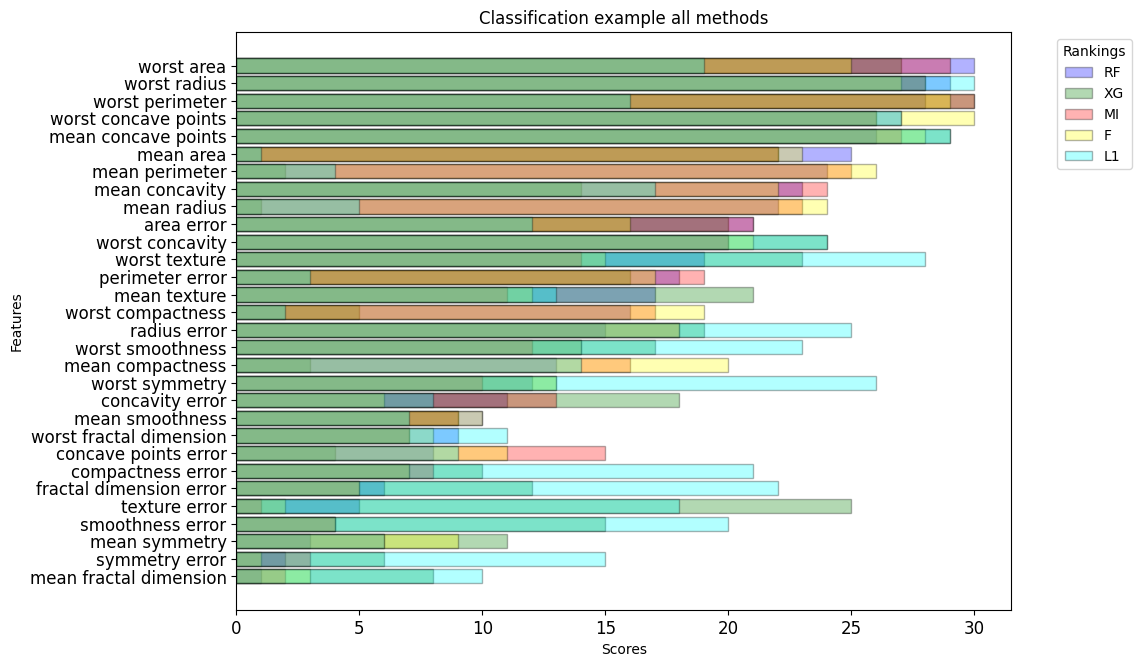

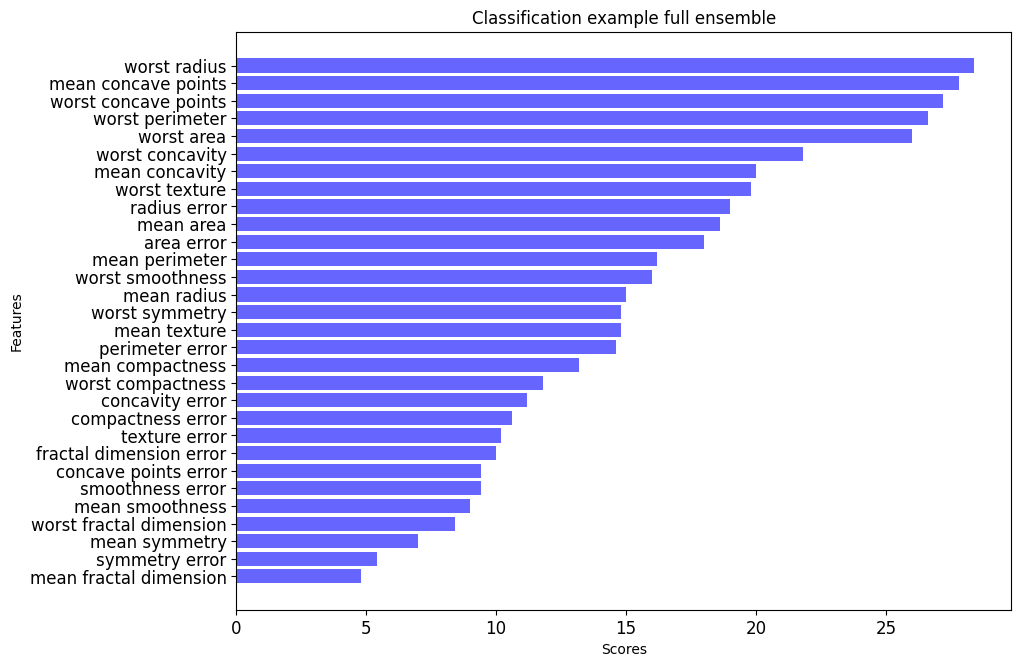

In [4]:
# Minimum settings
rankings = classification_ranking(X, y, predict=False)
scoring = voting(rankings)
plot_rankings(rankings, title='Classification example all methods')
plot_after_vote(scoring, title='Classification example full ensemble')

Fitting 3 folds for each of 5 candidates, totalling 15 fits


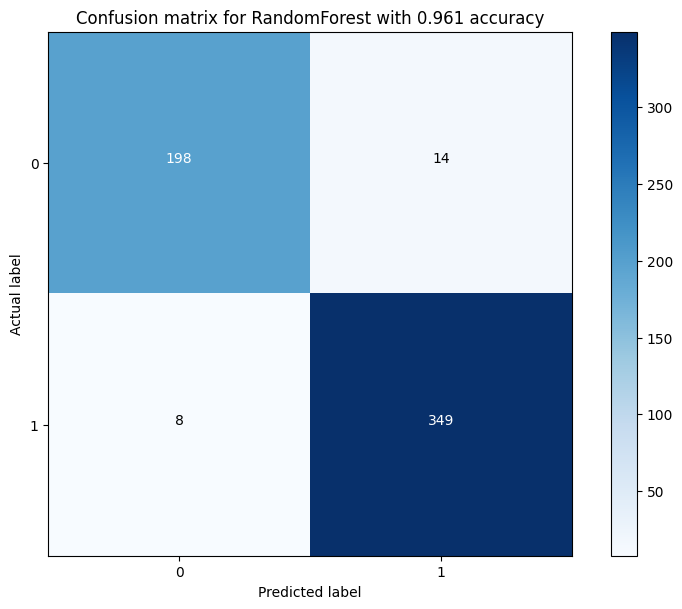

Fitting 3 folds for each of 5 candidates, totalling 15 fits


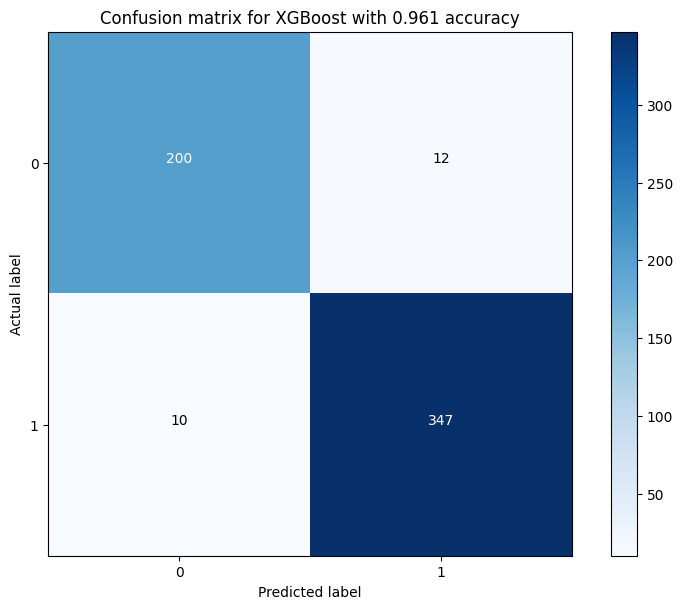

L1 ranking:   0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
# See if methods capture variance
rankings = classification_ranking(X, y, predict=True)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


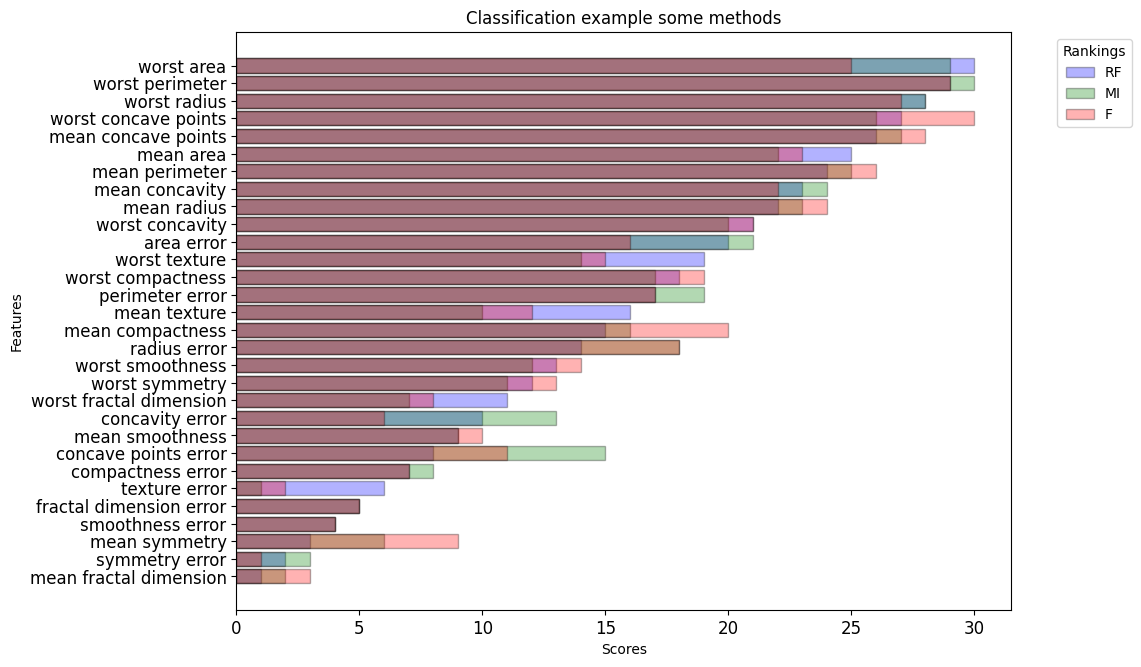

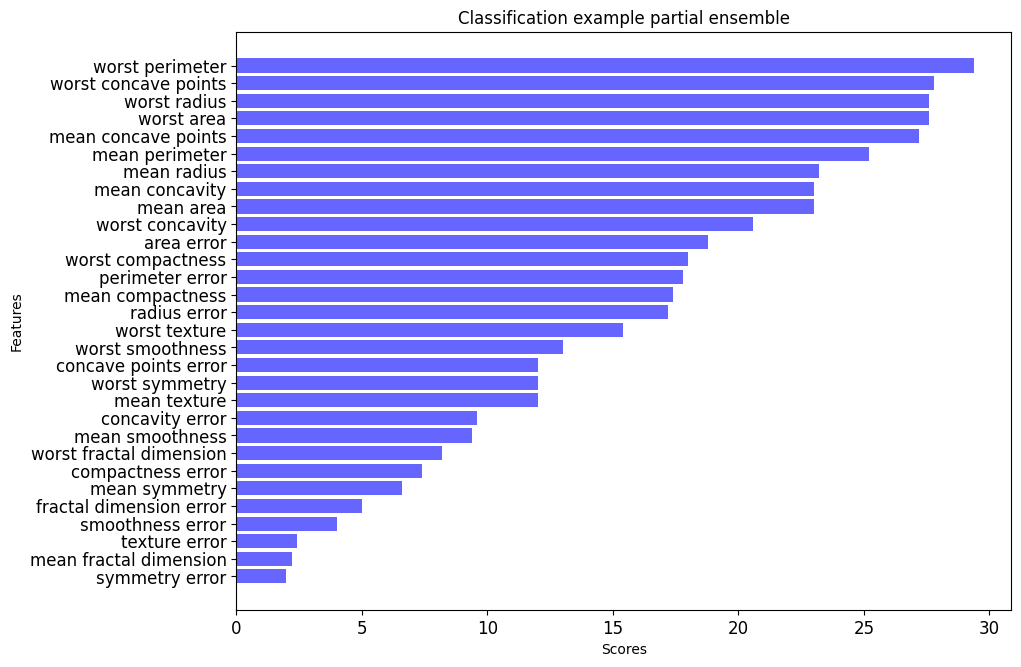

In [6]:
# Try different methods and different weights
rankings = classification_ranking(X, y, predict=False, choices=['mi', 'f_test', 'rf'])
scoring = voting(rankings, weights=(0.2, 0.4, 0.4))
plot_rankings(rankings, title='Classification example some methods')
plot_after_vote(scoring, title='Classification example partial ensemble')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


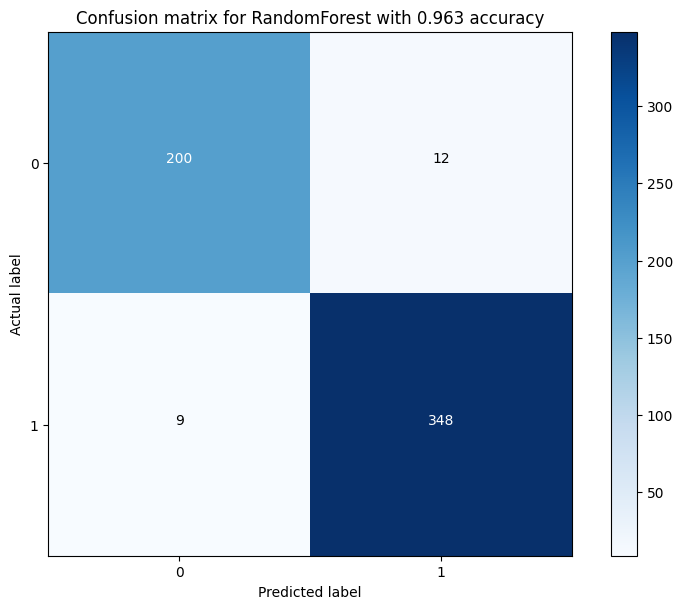

Fitting 5 folds for each of 30 candidates, totalling 150 fits


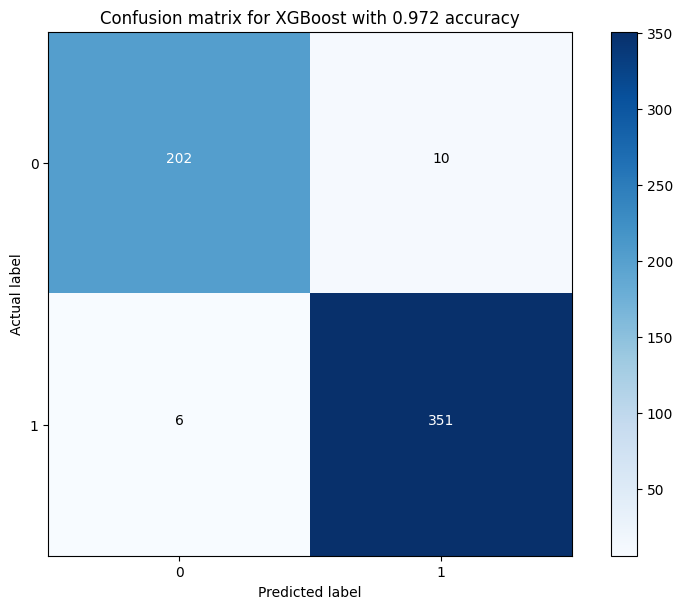

L1 ranking:   0%|          | 0/1000 [00:00<?, ?it/s]

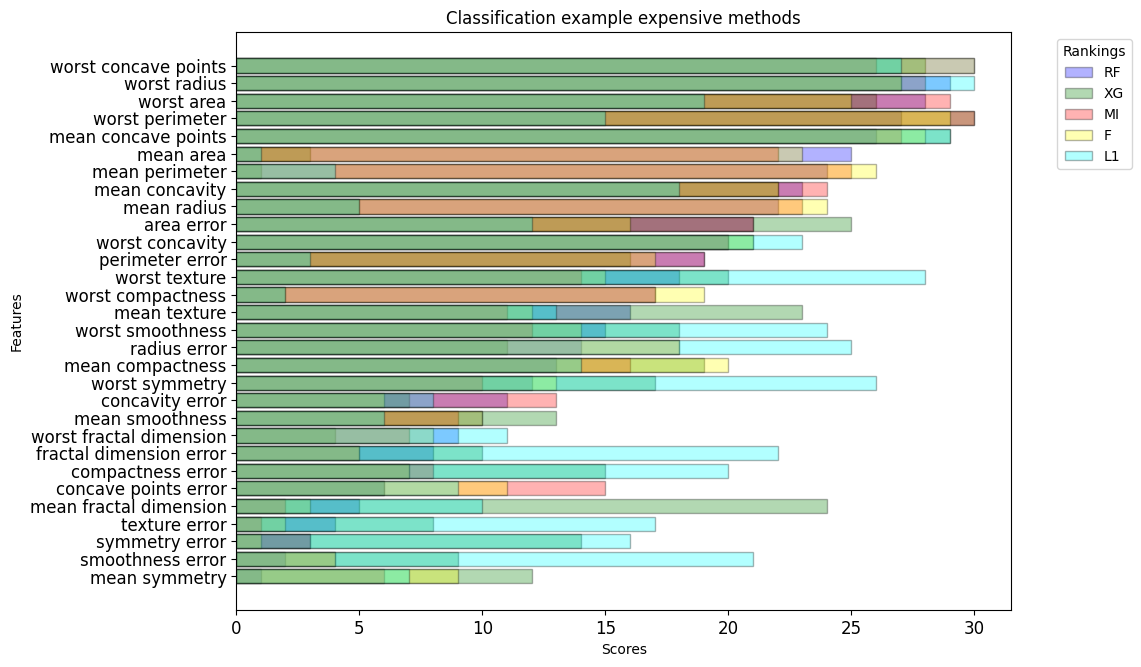

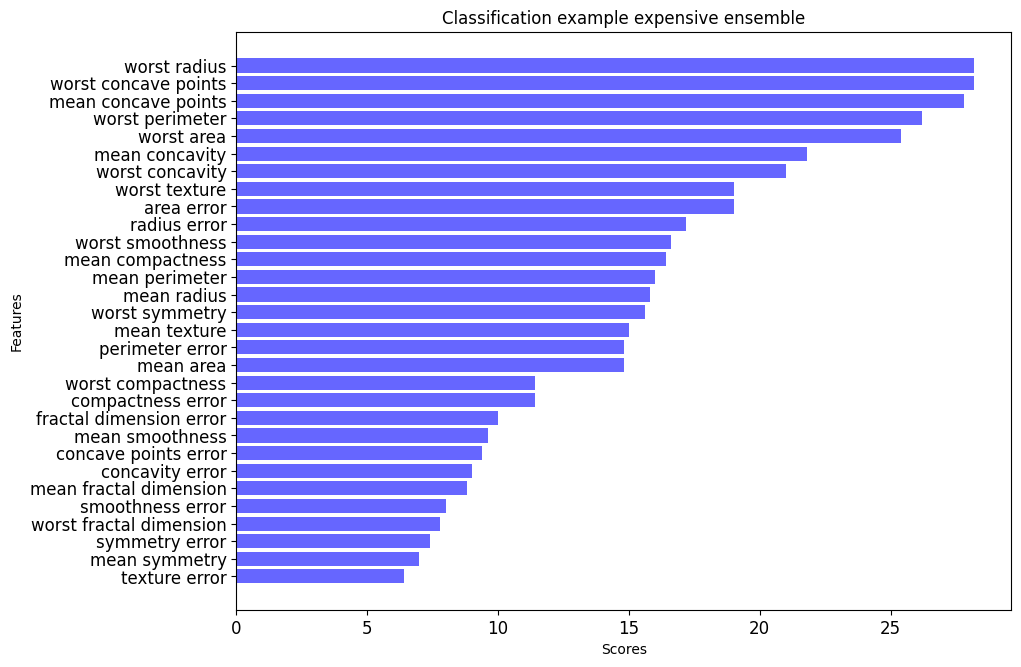

In [7]:
# Try a more thorough / expensive search
rankings = classification_ranking(X, y, cv=5, num_runs=30, scale=20, num_alphas=1000, predict=True)
scoring = voting(rankings)
plot_rankings(rankings, title='Classification example expensive methods')
plot_after_vote(scoring, title='Classification example expensive ensemble')
# Performance is slighlty better (explains more variance) and more nuanced feature ranking towards the less influential features